# Проект по анализу данных_Bacon001

## Импорт необходимых библиотек

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

## Выведем полученные данные после парсинга c авито:

In [2]:
df = pd.read_excel('data/final_table.xlsx')
df = df.drop('Column1',axis=1)
df.head()

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2
0,2-к. квартира,"62,5 м²",6,10 эт.,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201 500 ₽ за м²
1,Своб. планировка,"52,1 м²",1,24 эт.,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344 700 ₽ за м²
2,1-к. квартира,30 м²,14,30 эт.,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313 333 ₽ за м²
3,2-к. квартира,"89,7 м²",3,16 эт.,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315 379 ₽ за м²
4,2-к. квартира,"52,8 м²",5,14 эт.,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227 273 ₽ за м²


### Мы получили количественные показатели: м^2, этаж, этажей в доме, цена квартиры, цена за м^2 и качественные: тип квартиры, адресс, станция метро, окна, новостройка.

### Избавимся от дубликатов

In [3]:
df.drop_duplicates(inplace = True)
df

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2
0,2-к. квартира,"62,5 м²",6,10 эт.,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201 500 ₽ за м²
1,Своб. планировка,"52,1 м²",1,24 эт.,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344 700 ₽ за м²
2,1-к. квартира,30 м²,14,30 эт.,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313 333 ₽ за м²
3,2-к. квартира,"89,7 м²",3,16 эт.,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315 379 ₽ за м²
4,2-к. квартира,"52,8 м²",5,14 эт.,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227 273 ₽ за м²
...,...,...,...,...,...,...,...,...,...,...,...,...
4896,2-к. квартира,"37,4 м²",1,12 эт.,"Ташкентский пер., 5к3",ЮгоВосточная,0,1,0,0,9600000.0,256 684 ₽ за м²
4914,1-к. квартира,41 м²,13,14 эт.,"Полярная ул., 30к3",Медведково,0,1,0,0,10190000.0,248 537 ₽ за м²
4922,2-к. квартира,"55,5 м²",8,10 эт.,"Москва, Волоколамское шоссе, 6",Сокол,0,1,0,0,20300000.0,365 766 ₽ за м²
4931,1-к. квартира,36 м²,12,14 эт.,"Верхоянская ул., 8",Свиблово,0,1,0,0,9900000.0,275 000 ₽ за м²


## Преобразование типов

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3660 entries, 0 to 4947
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Тип квартиры               3660 non-null   object 
 1   м^2                        3660 non-null   object 
 2   Этаж                       3660 non-null   int64  
 3   Этажей в доме              3660 non-null   object 
 4   Адресс                     3660 non-null   object 
 5   Станция метро              3603 non-null   object 
 6   Окна во двор               3660 non-null   int64  
 7   Окна на улицу              3660 non-null   int64  
 8   Окна на солнечную сторону  3660 non-null   int64  
 9   Новостройка                3660 non-null   int64  
 10  Цена квартиры              3646 non-null   float64
 11  Цена за м^2                3660 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 371.7+ KB


### Удалим нечисловые символы в столбцах с количественными показателями:

In [5]:
df['Этажей в доме'] = df['Этажей в доме'].str.replace(r"['эт.']",'',regex = True)
df['м^2'] = df['м^2'].str.replace(r"[м²]",'',regex = True).str.replace(r"[',']",'.',regex = True)
df['Цена за м^2'] = df['Цена за м^2'].str.replace(r"[₽ за м²]",'',regex = True)
df.head()

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2
0,2-к. квартира,62.5,6,10,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201500
1,Своб. планировка,52.1,1,24,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344700
2,1-к. квартира,30,14,30,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313333
3,2-к. квартира,89.7,3,16,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315379
4,2-к. квартира,52.8,5,14,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227273


### Заменим значения для признака "тип квартиры":

In [6]:
df = df.replace({'Тип квартиры':{'Квартира-студия':0,
                                 '1-к. квартира':1,
                                 '2-к. квартира':2,
                                 '3-к. квартира':3,
                                 '4-к. квартира':4,
                                 '5-к. квартира':5,
                                 '6-к. квартира':6,
                                 '7-к. квартира':7,
                                 'Апартаменты-студия':8,
                                 '1-к. апартаменты':9,
                                 '2-к. апартаменты':10,
                                 '3-к. апартаменты':11,
                                 '4-к. апартаменты':12,
                                 '5-к. апартаменты':13,
                                 'Аукцион: квартира-студия':14,
                                 'Аукцион: 1-к. квартира':15,
                                 'Аукцион: 2-к. квартира':16,
                                 'Аукцион: 3-к. квартира':17,
                                 'Аукцион: 4-к. квартира':18,
                                 'Доля в квартира-студии':19,
                                 'Доля в 1-к. квартире':20,
                                 'Доля в 2-к. квартире':21,
                                 'Доля в 3-к. квартире':22,
                                 'Доля в 4-к. квартире':23,
                                 'Своб. планировка':24,}})
df.head()

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2
0,2,62.5,6,10,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201500
1,24,52.1,1,24,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344700
2,1,30,14,30,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313333
3,2,89.7,3,16,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315379
4,2,52.8,5,14,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227273


In [7]:
df['Тип квартиры'] = df['Тип квартиры'].astype(int)
df['Этажей в доме'] = df['Этажей в доме'].astype(int)
df['Цена за м^2'] = df['Цена за м^2'].astype(int)
df['м^2'] = df['м^2'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3660 entries, 0 to 4947
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Тип квартиры               3660 non-null   int32  
 1   м^2                        3660 non-null   float64
 2   Этаж                       3660 non-null   int64  
 3   Этажей в доме              3660 non-null   int32  
 4   Адресс                     3660 non-null   object 
 5   Станция метро              3603 non-null   object 
 6   Окна во двор               3660 non-null   int64  
 7   Окна на улицу              3660 non-null   int64  
 8   Окна на солнечную сторону  3660 non-null   int64  
 9   Новостройка                3660 non-null   int64  
 10  Цена квартиры              3646 non-null   float64
 11  Цена за м^2                3660 non-null   int32  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 328.8+ KB


## Удаление некоторых данных

### Посмотрим на то, сколько у нас квартир того или иного типа:

In [8]:
df['Тип квартиры'].value_counts()

2     1125
1      817
0      596
3      594
8      162
4      106
10      88
9       67
11      28
24      18
5       13
21       9
6        7
16       6
22       5
15       4
7        3
17       3
12       2
13       2
23       2
19       1
14       1
20       1
Name: Тип квартиры, dtype: int64

***Мы видим, что типам квартир с 14 по 23 (аукцион и доля в квартире) у нас соответствует довольно небольшое количество строк (32 из 3660). То есть менее 1%. Давайте уберем эти данные, т.к. у аукционных квартир вообще нет итоговой цены, что неудобно для нашего анализа, а у квартир, где покупается только доля, даже не указана эта доля (к тому же, это не полноценная квартира).***

In [9]:
df = df[(df['Тип квартиры'] < 14) | (df['Тип квартиры'] > 23)]
df

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2
0,2,62.5,6,10,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201500
1,24,52.1,1,24,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344700
2,1,30.0,14,30,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313333
3,2,89.7,3,16,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315379
4,2,52.8,5,14,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227273
...,...,...,...,...,...,...,...,...,...,...,...,...
4896,2,37.4,1,12,"Ташкентский пер., 5к3",ЮгоВосточная,0,1,0,0,9600000.0,256684
4914,1,41.0,13,14,"Полярная ул., 30к3",Медведково,0,1,0,0,10190000.0,248537
4922,2,55.5,8,10,"Москва, Волоколамское шоссе, 6",Сокол,0,1,0,0,20300000.0,365766
4931,1,36.0,12,14,"Верхоянская ул., 8",Свиблово,0,1,0,0,9900000.0,275000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3628 entries, 0 to 4947
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Тип квартиры               3628 non-null   int32  
 1   м^2                        3628 non-null   float64
 2   Этаж                       3628 non-null   int64  
 3   Этажей в доме              3628 non-null   int32  
 4   Адресс                     3628 non-null   object 
 5   Станция метро              3571 non-null   object 
 6   Окна во двор               3628 non-null   int64  
 7   Окна на улицу              3628 non-null   int64  
 8   Окна на солнечную сторону  3628 non-null   int64  
 9   Новостройка                3628 non-null   int64  
 10  Цена квартиры              3628 non-null   float64
 11  Цена за м^2                3628 non-null   int32  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 326.0+ KB


При этом, теперь у нас нет пропущенных значений в "Цене квартиры", т.к. мы убрали все аукционные квартиры. Заменим тип квартиры 24 на 14, чтобы не было путанницы

In [11]:
df.loc[df['Тип квартиры'] == 24, 'Тип квартиры'] = 14
df = df.reset_index(drop = True)

In [12]:
df

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2
0,2,62.5,6,10,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201500
1,14,52.1,1,24,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344700
2,1,30.0,14,30,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313333
3,2,89.7,3,16,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315379
4,2,52.8,5,14,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227273
...,...,...,...,...,...,...,...,...,...,...,...,...
3623,2,37.4,1,12,"Ташкентский пер., 5к3",ЮгоВосточная,0,1,0,0,9600000.0,256684
3624,1,41.0,13,14,"Полярная ул., 30к3",Медведково,0,1,0,0,10190000.0,248537
3625,2,55.5,8,10,"Москва, Волоколамское шоссе, 6",Сокол,0,1,0,0,20300000.0,365766
3626,1,36.0,12,14,"Верхоянская ул., 8",Свиблово,0,1,0,0,9900000.0,275000


In [13]:
df.isna().sum() #видим, что есть пропуски в столбце "станция метро"

Тип квартиры                  0
м^2                           0
Этаж                          0
Этажей в доме                 0
Адресс                        0
Станция метро                57
Окна во двор                  0
Окна на улицу                 0
Окна на солнечную сторону     0
Новостройка                   0
Цена квартиры                 0
Цена за м^2                   0
dtype: int64

In [14]:
#пропуски в столбце "станция метро" заменим на "не указано".
df.fillna({'Станция метро':"Не указано"},inplace=True)

df.isna().sum()

Тип квартиры                 0
м^2                          0
Этаж                         0
Этажей в доме                0
Адресс                       0
Станция метро                0
Окна во двор                 0
Окна на улицу                0
Окна на солнечную сторону    0
Новостройка                  0
Цена квартиры                0
Цена за м^2                  0
dtype: int64

### Разделим 'Тип квариры' на 2 колонки, где тип квартиры - квартира (0) или апартаменты (1), а число комнат - это число комнат hd

In [15]:
df['Число комнат'] = df['Тип квартиры']

df.loc[df['Тип квартиры'] >= 8, 'Число комнат'] = df['Тип квартиры'] - 8
df.loc[df['Тип квартиры'] == 14, 'Число комнат'] = 1 # так как это - свободная планировка

df.loc[df['Тип квартиры'] < 8, 'Тип квартиры'] = 0
df.loc[df['Тип квартиры'] == 14, 'Тип квартиры'] = 0
df.loc[df['Тип квартиры'] >= 8, 'Тип квартиры'] = 1

df

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2,Число комнат
0,0,62.5,6,10,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201500,2
1,0,52.1,1,24,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344700,1
2,0,30.0,14,30,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313333,1
3,0,89.7,3,16,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315379,2
4,0,52.8,5,14,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227273,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3623,0,37.4,1,12,"Ташкентский пер., 5к3",ЮгоВосточная,0,1,0,0,9600000.0,256684,2
3624,0,41.0,13,14,"Полярная ул., 30к3",Медведково,0,1,0,0,10190000.0,248537,1
3625,0,55.5,8,10,"Москва, Волоколамское шоссе, 6",Сокол,0,1,0,0,20300000.0,365766,2
3626,0,36.0,12,14,"Верхоянская ул., 8",Свиблово,0,1,0,0,9900000.0,275000,1


## Поиск и обработка выбросов

In [16]:
numeric_columns = ['м^2','Этаж','Этажей в доме','Цена квартиры','Цена за м^2', 'Число комнат']
df[numeric_columns].describe()

,м^2,Этаж,Этажей в доме,Цена квартиры,Цена за м^2,Число комнат
count,3628.000000,3628.000000,3628.000000,3.628000e+03,3.628000e+03,3628.000000
mean,49.484454,9.774807,19.776185,1.574217e+07,2.967697e+05,1.588754
std,29.096594,8.456134,10.694910,2.252589e+07,1.240452e+05,1.137915
min,10.000000,1.000000,1.000000,2.090000e+06,7.934800e+04,0.000000
25%,32.300000,3.000000,10.000000,8.400000e+06,2.333330e+05,1.000000
50%,44.000000,7.000000,17.000000,1.174241e+07,2.743935e+05,2.000000
75%,61.900000,14.000000,30.000000,1.687932e+07,3.274142e+05,2.000000
max,418.000000,81.000000,95.000000,8.745900e+08,3.809190e+06,7.000000


### Построим гистограммы:

array([[<AxesSubplot:title={'center':'м^2'}>,
        <AxesSubplot:title={'center':'Этаж'}>],
       [<AxesSubplot:title={'center':'Этажей в доме'}>,
        <AxesSubplot:title={'center':'Цена квартиры'}>],
       [<AxesSubplot:title={'center':'Цена за м^2'}>,
        <AxesSubplot:title={'center':'Число комнат'}>]], dtype=object)

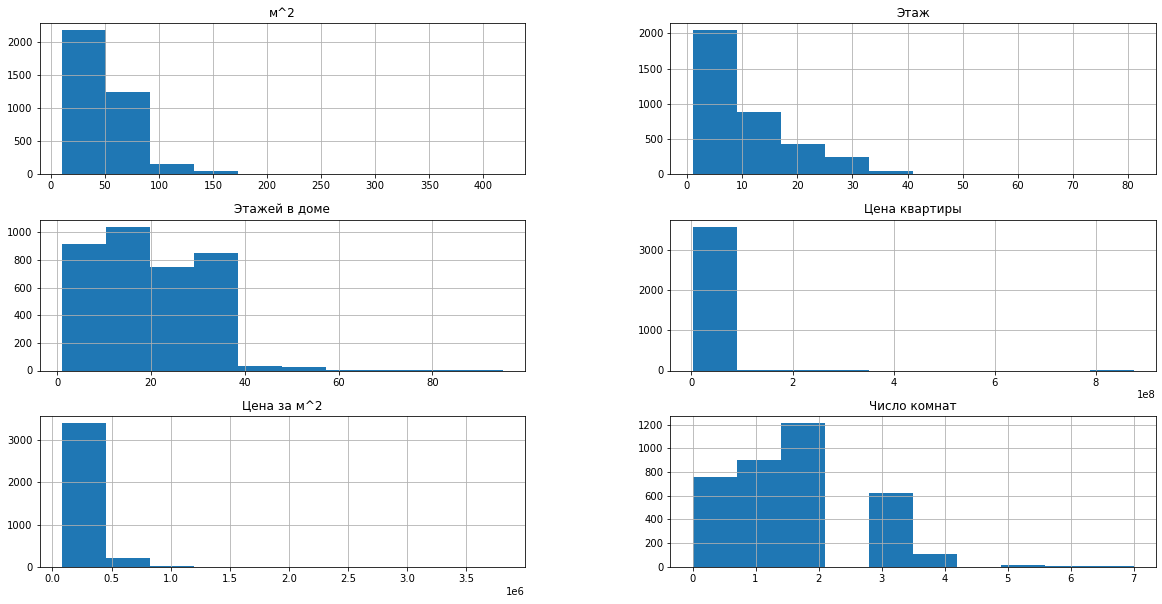

In [17]:
df[numeric_columns].hist(figsize=(20, 10))

***Видим, что в некоторых данных присутствуют хвосты. Прологорифмируем.***

array([[<AxesSubplot:title={'center':'м^2'}>,
        <AxesSubplot:title={'center':'Этаж'}>],
       [<AxesSubplot:title={'center':'Этажей в доме'}>,
        <AxesSubplot:title={'center':'Цена квартиры'}>],
       [<AxesSubplot:title={'center':'Цена за м^2'}>,
        <AxesSubplot:title={'center':'Число комнат'}>]], dtype=object)

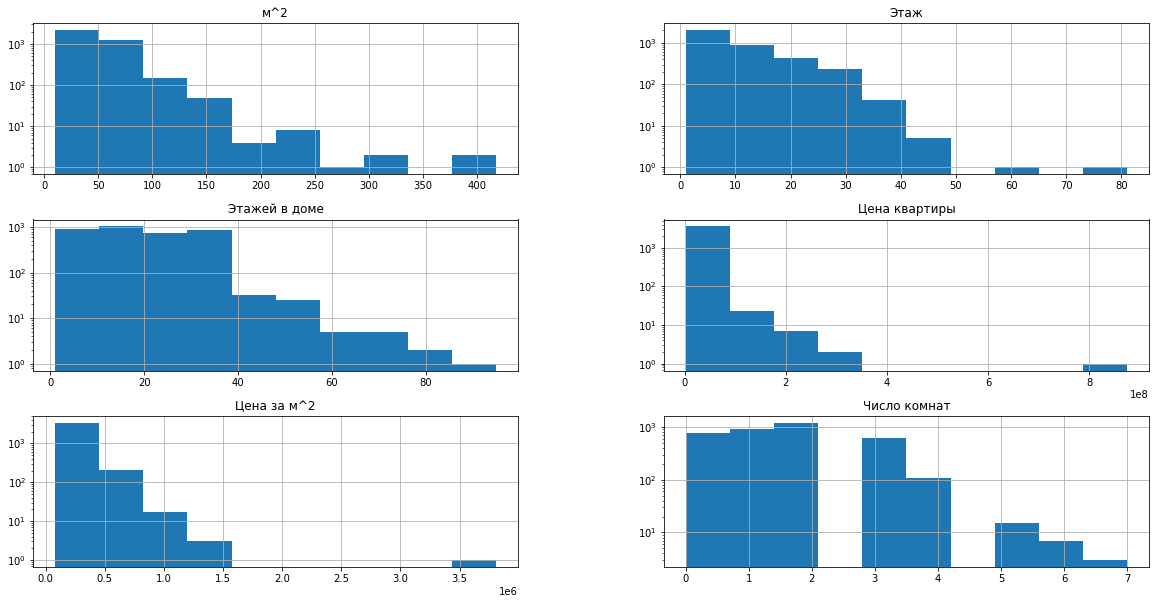

In [19]:
df[numeric_columns].hist(figsize=(20, 10), log=True)

***Почти во всех колонках у нас присутствуют анамальные значения. Посмотрим на зависимость цены квартиры от количественных показателей.***

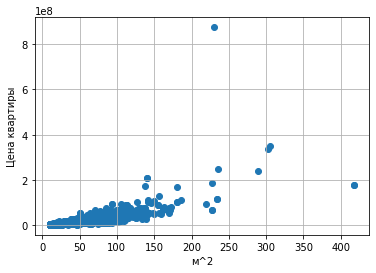

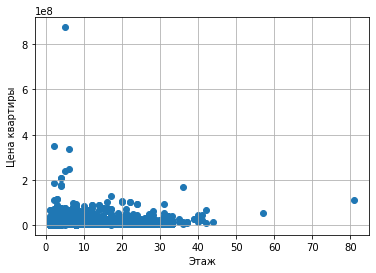

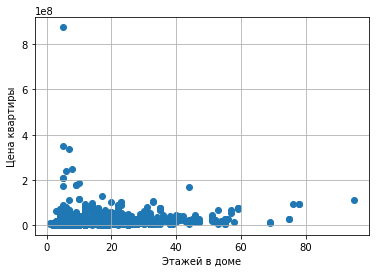

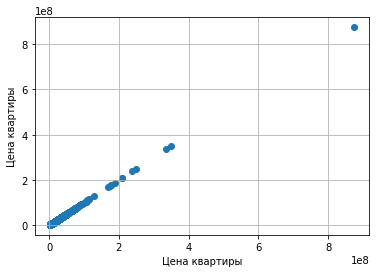

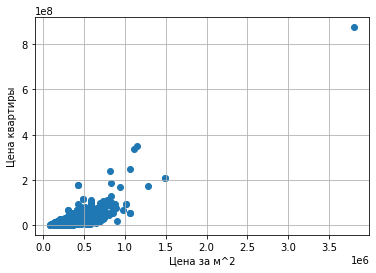

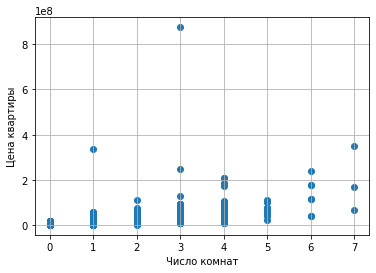

In [20]:
# Исследуем зависимость цены квартиры от количественных показателей
y = df['Цена квартиры']
for n in numeric_columns:
    x = df[n]
    plt.scatter(x,y)
    plt.xlabel(n)
    plt.ylabel('Цена квартиры')
    plt.grid()
    plt.show()

***На всех этих графиках можно заметить выбросы. Попробуем убрать их.***

In [21]:
def outlier_std(data, col, threshold = 3):
    mean = data[col].mean()
    std = data[col].std()
    
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col] > up_bound, data[col] < low_bound], axis = 1).any(axis=1)
    return anomalies, up_bound, low_bound

In [22]:
a, l, r = outlier_std(df, numeric_columns)
a.value_counts()

False    3497
True      131
dtype: int64

In [23]:
df['Аномалия'] = a
df_2 = df[df['Аномалия'] != True]
df_2

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2,Число комнат,Аномалия
0,0,62.5,6,10,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201500,2,False
1,0,52.1,1,24,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344700,1,False
2,0,30.0,14,30,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313333,1,False
3,0,89.7,3,16,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315379,2,False
4,0,52.8,5,14,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227273,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3623,0,37.4,1,12,"Ташкентский пер., 5к3",ЮгоВосточная,0,1,0,0,9600000.0,256684,2,False
3624,0,41.0,13,14,"Полярная ул., 30к3",Медведково,0,1,0,0,10190000.0,248537,1,False
3625,0,55.5,8,10,"Москва, Волоколамское шоссе, 6",Сокол,0,1,0,0,20300000.0,365766,2,False
3626,0,36.0,12,14,"Верхоянская ул., 8",Свиблово,0,1,0,0,9900000.0,275000,1,False


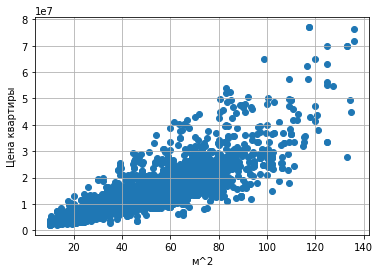

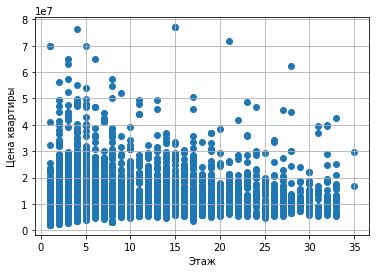

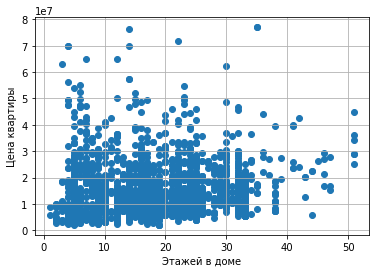

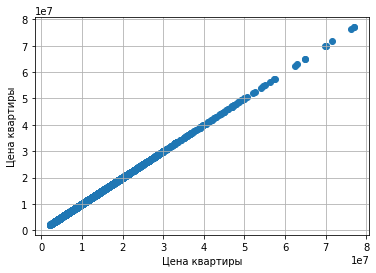

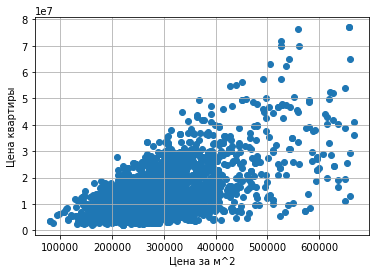

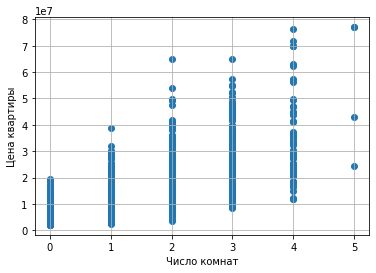

In [24]:
# Снова исследуем зависимость цены квартиры от количественных показателей
y = df_2['Цена квартиры']
for m in numeric_columns:
    x = df_2[m]
    plt.scatter(x,y)
    plt.xlabel(m)
    plt.ylabel('Цена квартиры')
    plt.grid()
    plt.show()

array([[<AxesSubplot:title={'center':'м^2'}>,
        <AxesSubplot:title={'center':'Этаж'}>],
       [<AxesSubplot:title={'center':'Этажей в доме'}>,
        <AxesSubplot:title={'center':'Цена квартиры'}>],
       [<AxesSubplot:title={'center':'Цена за м^2'}>,
        <AxesSubplot:title={'center':'Число комнат'}>]], dtype=object)

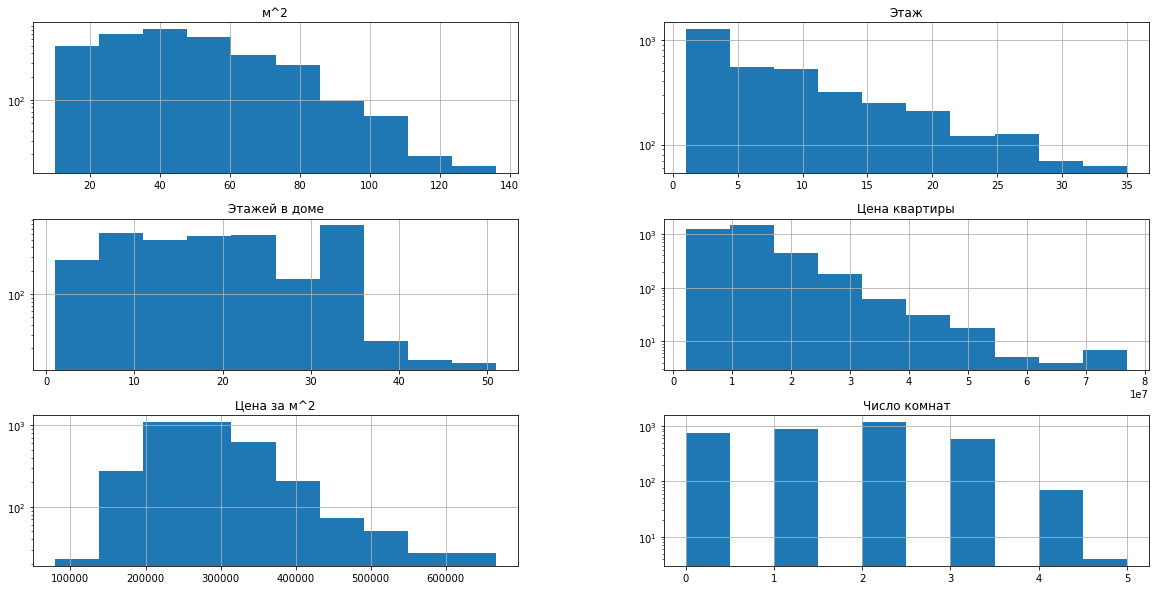

In [25]:
df_2[numeric_columns].hist(figsize=(20, 10), log=True)

***Видим, что мы действительно снизили влияние анамалий***

### Построим корреляционную матрицу

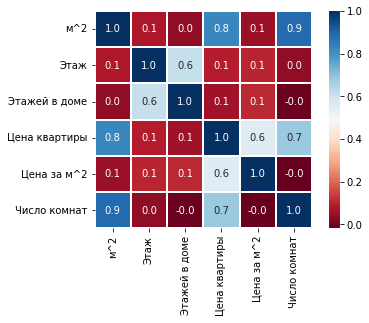

In [26]:
sns.heatmap(df_2[numeric_columns].corr(method='pearson'), 
            square=True, annot=True, fmt=".1f", 
            linewidths=0.1, cmap="RdBu");

***Из нашей матрицы видим, что цена квартиры коррелирует с площадью, числом комнат и ценой за м^2***
***Также очевидна корреляция числа комнат и плозади (что не удивительно) и этажности с общим числом этажей в доме***

### Посмотрим на то, как влияют окна на цену квартиры при одинаковом метраже. Для этого сделаем следующие графики:

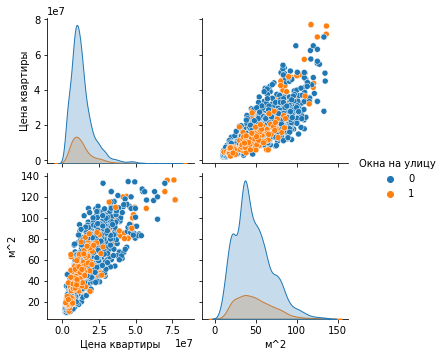

In [27]:
columns = ['Цена квартиры', 'м^2', 'Окна на улицу']
sns.pairplot(df_2[columns], hue='Окна на улицу');

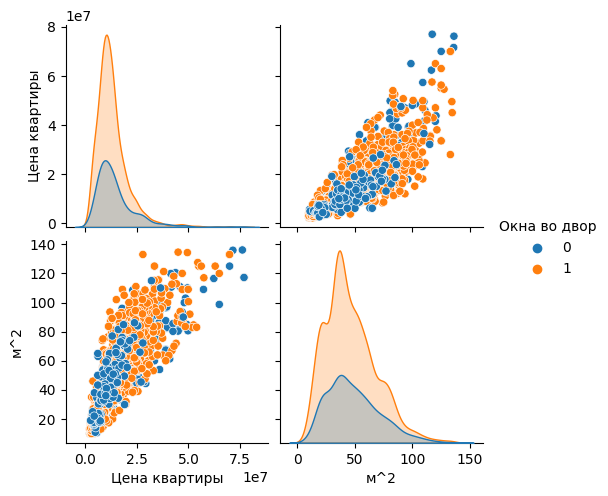

In [27]:
columns = ['Цена квартиры', 'м^2', 'Окна во двор']
sns.pairplot(df_2[columns], hue='Окна во двор');

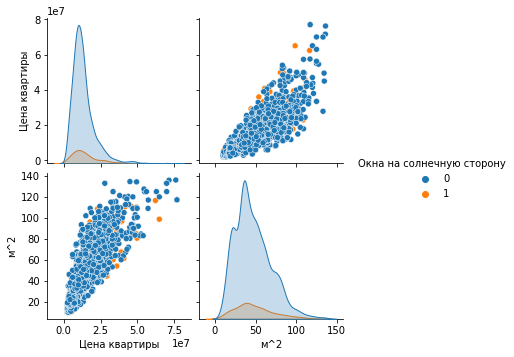

In [28]:
columns = ['Цена квартиры', 'м^2', 'Окна на солнечную сторону']
sns.pairplot(df_2[columns], hue='Окна на солнечную сторону');

***Можем заметить, что, вероятно, окна во двор ценятся больше, чем окна на улицу при прочих равных (возможно, это связано с уровнем внешнего шума)***

### Гипотезы

Исследуя графики, видим, что есть положительная зависимость цены квартиры от м^2, числа комнат и окон во двор.

Сформулируем наши гипотезы: 
1. Чем больше площадь, тем выше стоимость квартиры.
2. Если в квартире окна выходят во двор, она стоит дороже.
3. Чем больше в квартире жилых комнат, тем больше она ценится.

## Новые признаки

__1. Мы считаем, что цена зависит от округом, поэтому добавим район и административный округ:__ 

Также можно предположить, что центральный округ увеличивает цену.

In [50]:
district = pd.read_excel('data/Район.xlsx')

AdmArea = []
District = []
for i in df['Станция метро']:
    dis = district[district['Station'] == i]['AdmArea']
    st = district[district['Station'] == i]['District']
    if dis.empty == True:
        AdmArea.append('')
        District.append('')
    else:
        AdmArea.append(dis.iloc[0])
        District.append(st.iloc[0])


df['Район'] = District
df['Административный округ'] = AdmArea
df.head()

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2,Число комнат,Район,Административный округ
0,0,62.5,6,10,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201500,2,район Преображенское,Восточный административный округ
1,0,52.1,1,24,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344700,1,район Покровское-Стрешнево,Северо-Западный административный округ
2,0,30.0,14,30,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313333,1,Бескудниковский район,Северный административный округ
3,0,89.7,3,16,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315379,2,район Покровское-Стрешнево,Северо-Западный административный округ
4,0,52.8,5,14,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227273,2,,


Докажем зависимость центрального округа на цены, когда обучим модель (см.в линейной регрессии)

__2.Добавим тип этажа квартиры; варианты — первый, последний, другой__ для того, чтобы проверить влияет ли это на цены? 

In [51]:
def floor(row):
    if row['Этаж'] == 1:
        return 'первый'
    if row['Этаж'] == row['Этажей в доме']:
        return 'последний'
    else:
        return 'другой'
df['Тип_этажа'] = df.apply(floor, axis = 1 )

In [52]:
df

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,Цена квартиры,Цена за м^2,Число комнат,Район,Административный округ,Тип_этажа
0,0,62.5,6,10,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,12593750.0,201500,2,район Преображенское,Восточный административный округ,другой
1,0,52.1,1,24,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,17958870.0,344700,1,район Покровское-Стрешнево,Северо-Западный административный округ,первый
2,0,30.0,14,30,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,9400000.0,313333,1,Бескудниковский район,Северный административный округ,другой
3,0,89.7,3,16,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,28289500.0,315379,2,район Покровское-Стрешнево,Северо-Западный административный округ,другой
4,0,52.8,5,14,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,12000000.0,227273,2,,,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3623,0,37.4,1,12,"Ташкентский пер., 5к3",ЮгоВосточная,0,1,0,0,9600000.0,256684,2,,,первый
3624,0,41.0,13,14,"Полярная ул., 30к3",Медведково,0,1,0,0,10190000.0,248537,1,район Северное Медведково,Северо-Восточный административный округ,другой
3625,0,55.5,8,10,"Москва, Волоколамское шоссе, 6",Сокол,0,1,0,0,20300000.0,365766,2,район Сокол,Северный административный округ,другой
3626,0,36.0,12,14,"Верхоянская ул., 8",Свиблово,0,1,0,0,9900000.0,275000,1,район Свиблово,Северо-Восточный административный округ,другой


### Изучим зависимость цены квадратного метра от этажа (первого или последнего)

,mean,count,median
Тип_этажа,,,
первый,257722.417391,345,250000
последний,314988.365079,252,277457


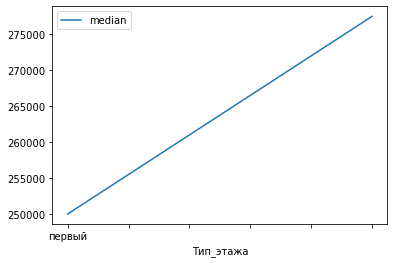

In [53]:
pivot_table = df.query('Тип_этажа != "другой"').pivot_table(index = 'Тип_этажа', values = 'Цена за м^2', aggfunc = ['mean', 'count', 'median'])
pivot_table.columns = ['mean', 'count', 'median']
pivot_table.plot(y = 'median')
pivot_table

__Вывод:__ из графика видно, что квартиры на первом этаже дешевле, чем квартиры на последнем этаже. Это еще одна наша гипотеза.

Проверим сразу гипотезу:
  >H0: Средняя цена квартир на первом этаже не отличается или выше, чем средняя цена квартир на последнем этаже.  
   H1: Средняя цена квартир на первом этаже ниже, чем средняя цена квартир на последнем этаже.  

Так как данные о цене квартиры на первом этаже и последнем этаже являются независимыми выборками, используем односторонний t-test:

In [54]:
import pandas as pd
from scipy import stats


Первый_этаж = df[df['Тип_этажа'] == 'первый']['Цена квартиры']
Последний_этаж = df[df['Тип_этажа'] == 'последний']['Цена квартиры']

t_statistic, p_value = stats.ttest_ind(Первый_этаж, Последний_этаж, alternative='less', equal_var=False)
print("p-значение:", p_value)

alpha = 0.05  

if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")


p-значение: 0.0006558126453774561
Отвергаем нулевую гипотезу


__Вывод:__ квартиры на первом этаже имеют более низкую среднюю цену по сравнению с квартирами на последнем этаже.

# Проверка Гипотез

__Проверим первую гипотезу:"Чем больше площадь, тем выше стоимость квартиры".__
   > Сформулируем нулевую и альтернативную гипотезу:  
        H0: Между площадью квартир и их стоимостью нет связи. Иными словами, коэффициент корреляции между площадью и стоимостью квартир равен нулю.  
        H1: Существует связь между площадью квартир и их стоимостью. Более конкретно, чем больше площадь, тем выше стоимость квартиры. Иными словами, коэффициент корреляции между площадью и стоимостью квартир отличен от нуля и положительный.  
        


Для проверки используем коэффициент корреляции Пирсона:  
уровень значимости = 0,05

In [55]:
import numpy as np
from scipy.stats import pearsonr

площадь = df["м^2"]
цена = df["Цена квартиры"]


corr, p_value = pearsonr(площадь, цена)

alpha = 0.05

print("Коэффициент корреляции:", corr)
print("p-значение:", p_value)


if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
    print("Существует связь между площадью и стоимостью квартир")
else:
    print("Не отвергаем нулевую гипотезу")
    print("Недостаточно данных для подтверждения связи")

Коэффициент корреляции: 0.6808284839155991
p-значение: 0.0
Отвергаем нулевую гипотезу
Существует связь между площадью и стоимостью квартир


__Вывод:__ можно сделать вывод о наличии статистически значимой положительной связи между площадью квартир и их стоимостью. Это означает, что чем больше площадь квартиры, тем выше ее стоимость.

__Вторая гипотеза: Если в квартире окна выходят во двор, она стоит дороже.__

>  H0: Расположение окон (во двор или на улицу) не влияет на стоимость квартиры.  
   H1: Квартиры с окнами, выходящими во двор, имеют более высокую стоимость по сравнению с квартирами, где окна выходят на улицу.
   
Для проверки гипотезы используем t-тест Стьюдента:

In [56]:
import scipy.stats as stats


цены = df["Цена квартиры"]
окна_во_двор = df["Окна во двор"]

# Разделим цены на две группы: окна во двор (1) и окна не во двор (0)
группа_1 = [цены[i] for i in range(len(цены)) if окна_во_двор[i] == 1]
группа_0 = [цены[i] for i in range(len(цены)) if окна_во_двор[i] == 0]


t_statistic, p_value = stats.ttest_ind(группа_1, группа_0)
print("p-значение:", p_value)

if p_value < 0.05:
    print("Гипотеза отвергается: квартиры с окнами во двор стоят дороже.")
else:
    print("Гипотеза подтверждается: отсутствует статистически значимая разница в цене.")


p-значение: 0.0003730639136628028
Гипотеза отвергается: квартиры с окнами во двор стоят дороже.


__Вывод:__ нулевая гипотеза отвергается, наличие окон во двор влияет на цены квартир и они стоят дороже, чем квартиры без окон во двор.

__Третья гипотеза: Чем больше в квартире жилых комнат, тем больше она ценится.__ 

_под ценностью мы подразумеваем стоимость_  

  > Сформулируем нулевую и альтернативную гипотезу:  
        H0: Между числом комнат и их стоимостью нет связи. Иными словами, коэффициент корреляции между числом комнат и стоимостью квартир равен нулю.  
        H1: Существует связь между числом комнат в квартире и их стоимостью. Более конкретно, чем число комнат, тем выше стоимость квартиры. Иными словами, коэффициент корреляции между числом комнат и стоимостью квартир отличен от нуля и положительный.  
        

Для проверки используем коэффициент корреляции Пирсона:  
уровень значимости = 0,05

In [96]:
import numpy as np
from scipy.stats import pearsonr

комнаты = df["Число комнат"]
цена = df["Цена квартиры"]


corr, p_value = pearsonr(комнаты, цена)

alpha = 0.05

print("Коэффициент корреляции:", corr)
print("p-значение:", p_value)


if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
    print("Существует связь между площадью и стоимостью квартир")
else:
    print("Не отвергаем нулевую гипотезу")
    print("Недостаточно данных для подтверждения связи")

Коэффициент корреляции: 0.43831756228854396
p-значение: 3.1443393061830702e-170
Отвергаем нулевую гипотезу
Существует связь между площадью и стоимостью квартир


__Вывод:__ можно сделать вывод о наличии статистически значимой положительной связи между числом комнат в квартире и их стоимостью. Это означает, что чем больше число комнат в квартире, тем выше ее стоимость.

# Машинное обучение 

> В наших данных есть переменная - стоимость квартиры, которую мы хотим предсказать. Мы будем использовать такую метрику, как средняя квадратичная ошибка __(MSE)__, средняя абсолютная ошибка __(MAE)__ и коэффициент детерминации __(R-squared)__, чтобы измерить качество модели.  
  __Модели:__   
  1.Линейная регресия  
  2.KNN  
  3.Случайный лес    

#### Обучение и оценка качества модели: разобьем данные на обучающую и тестовую выборки.  
Используем соотношение 80:20 для разделения данных. Обучающая выборка будет использоваться для обучения модели, а тестовая выборка - для оценки ее производительности.  

In [58]:
from sklearn.model_selection import train_test_split

x = df[['Тип квартиры', 'м^2','Этаж', 'Окна во двор','Окна на улицу','Окна на солнечную сторону',]]
y = df["Цена квартиры"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [59]:
#Посмотрим на размерность новых наборов данных:

# размерность обучающей
print(x_train.shape, y_train.shape)
 
# и тестовой выборки
print(x_test.shape, y_test.shape)

(2902, 6) (2902,)
(726, 6) (726,)


#### Теперь обучим модель и сделаем прогноз.

__1.Линейная регрессия:__

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

На основе нескольких независимых переменных (x) предскажем цену на жилье (y) и выведем первые пять значений с помощью диапазона индексов:

In [61]:
y_pred = model.predict(x_test)
print(y_pred[:5])

[13379710.07634134  2062425.77557199 15610399.07909065 12372272.29827776
  1218014.90203003]


__1.1.Оценим качество модели. Посчитаем среднеквадратическую ошибку, среднюю абсолютную ошибку и коэффициент детерминации.__

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 154464798564511.8
Mean Absolute Error: 6384755.095239149
R-squared: 0.689530086511247


__Выводы:__ Большое значение MAE и МSE указывают на ошибки в предсказаниях модели. R^2 (0.689530086511247) указывает на то, что модель объясняет около 68.95% дисперсии цены квартиры. Это может означать, что модель имеет относительно хорошую предсказательную способность, но все равно остается значительная часть дисперсии, которая не объясняется моделью.

##### 2. kNN  
В этой модели параметр __n_neighbors__, который указывает количество ближайших соседей и который будет использоваться для предсказания, возьмем равным 25, так как это значение показывает наилучший результат на метрике оценки. Чем больше параметр, тем хуже оценка модели.

In [73]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=25)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred[:5])

[12615006.    7228905.75 17331806.8  13542818.95  6098469.3 ]


In [76]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 125917681739696.36
Mean Absolute Error: 4172732.3512396696
R-squared: 0.7469089907879529


__Выводы:__ модель KNN показывает лучшие результаты по сравнению с предыдущей моделью линейной регрессии. Она имеет меньшие значения MSE и MAE, что указывает на меньшие ошибки в предсказаниях цены квартиры. Кроме того, более высокое значение R^2 свидетельствует о более лучшей способности модели KNN. Однако, все равно остается место для улучшения модели и ее предсказательной точности.

__3.Cлучайный лес__  
Учитывая качество прогноза, оптимальное значение __n_estimators__ равное 2000

In [77]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=2000, random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)
print(y_pred[:5])

[16230382.83928572  7010429.83519643 12148866.066      11829212.768
  4284930.938     ]


In [78]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 95167201717009.28
Mean Absolute Error: 4092790.4196441877
R-squared: 0.8087165933039007


__Выводы:__ Значение R^2 в модели случайного леса также выше, чем в предыдущих моделях линейной регрессии и KNN. Это означает, что модель случайного леса лучше объясняет дисперсию цены квартиры и имеет более высокую предсказательную способность. Кроме того, имеет меньшие значения MSE и MAE, что указывает на более точные предсказания цены квартиры по сравнению с предыдущими моделями.

## Попробуем улучшить модель:

Чтобы улучшить нашу модель, добавим новый категориальный признак, который добавим в модель. Для этого мы создаем много новых признаков, у которых значения 0 или 1.

In [79]:
df['Административный округ'].value_counts()

Северо-Восточный административный округ    542
Западный административный округ            514
Юго-Восточный административный округ       498
Южный административный округ               451
Северный административный округ            330
Центральный административный округ         283
Восточный административный округ           269
Северо-Западный административный округ     260
Юго-Западный административный округ        260
                                           165
Новомосковский административный округ       56
Name: Административный округ, dtype: int64

Добавим колонки с Округами кроме Новомосковского, т.к. его значений меньше всего (чтобы эти признаки не были линейно зависимы) для нашей модели.

In [80]:
df['Северный административный округ'] = (df['Административный округ'] == 'Северный административный округ').astype(int)
df['Центральный административный округ'] = (df['Административный округ'] == 'Центральный административный округ').astype(int)
df['Северо-Восточный административный округ'] = (df['Административный округ'] == 'Северо-Восточный административный округ').astype(int)
df['Восточный административный округ'] = (df['Административный округ'] == 'Восточный административный округ').astype(int)
df['Юго-Восточный административный округ'] = (df['Административный округ'] == 'Юго-Восточный административный округ').astype(int)
df['Южный административный округ'] = (df['Административный округ'] == 'Южный административный округ').astype(int)
df['Юго-Западный административный округ'] = (df['Административный округ'] == 'Юго-Западный административный округ').astype(int)
df['Западный административный округ'] = (df['Административный округ'] == 'Западный административный округ').astype(int)
df['Северо-Западный административный округ'] = (df['Административный округ'] == 'Северо-Западный административный округ').astype(int)
df

,Тип квартиры,м^2,Этаж,Этажей в доме,Адресс,Станция метро,Окна во двор,Окна на улицу,Окна на солнечную сторону,Новостройка,...,Тип_этажа,Северный административный округ,Центральный административный округ,Северо-Восточный административный округ,Восточный административный округ,Юго-Восточный административный округ,Южный административный округ,Юго-Западный административный округ,Западный административный округ,Северо-Западный административный округ
0,0,62.5,6,10,"пр-д Измайловский, д. 22, корп. 1",Локомотив,0,0,1,1,...,другой,0,0,0,1,0,0,0,0,0
1,0,52.1,1,24,"ул. Летная, д. 95Б, корп. 2",Спартак,0,0,1,1,...,первый,0,0,0,0,0,0,0,0,1
2,0,30.0,14,30,"Ильменский проезд, вл. 12",Селигерская,0,0,1,1,...,другой,1,0,0,0,0,0,0,0,0
3,0,89.7,3,16,"ул. Летная, вл. 95Б",Спартак,0,0,1,1,...,другой,0,0,0,0,0,0,0,0,1
4,0,52.8,5,14,"ш. Ленинградское, д. 228, корп. 3",рн Молжаниновский,0,0,1,1,...,другой,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3623,0,37.4,1,12,"Ташкентский пер., 5к3",ЮгоВосточная,0,1,0,0,...,первый,0,0,0,0,0,0,0,0,0
3624,0,41.0,13,14,"Полярная ул., 30к3",Медведково,0,1,0,0,...,другой,0,0,1,0,0,0,0,0,0
3625,0,55.5,8,10,"Москва, Волоколамское шоссе, 6",Сокол,0,1,0,0,...,другой,1,0,0,0,0,0,0,0,0
3626,0,36.0,12,14,"Верхоянская ул., 8",Свиблово,0,1,0,0,...,другой,0,0,1,0,0,0,0,0,0


__Теперь обучим и оценим качество моделей с учетом нового признака__

In [81]:
from sklearn.model_selection import train_test_split

x = df[['Тип квартиры', 'м^2','Этаж', 'Окна во двор','Окна на улицу','Окна на солнечную сторону','Северо-Западный административный округ', 'Западный административный округ', 'Юго-Западный административный округ', 'Южный административный округ','Юго-Восточный административный округ','Восточный административный округ', 'Северо-Восточный административный округ','Центральный административный округ','Северный административный округ']]
y = df["Цена квартиры"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

__1.Линейная регрессия__

In [89]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred[:5])

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

[14940219.9272462   6018028.0767989   9032937.83085086 13067015.06137768
 15114127.05414027]
Mean Squared Error: 150750359686005.28
Mean Absolute Error: 5901993.466631848
R-squared: 0.6381948771393086


In [90]:
#Посмотрим на коэффициенты:
pd.DataFrame(zip(['Тип квартиры', 'м^2','Этаж', 'Окна во двор','Окна на улицу','Окна на солнечную сторону','Северо-Западный административный округ', 'Западный административный округ', 'Юго-Западный административный округ', 'Южный административный округ','Юго-Восточный административный округ','Восточный административный округ', 'Северо-Восточный административный округ','Центральный административный округ','Северный административный округ'], model.coef_))

,0,1
0,Тип квартиры,5.166201e+06
1,м^2,5.069295e+05
2,Этаж,2.402543e+04
3,Окна во двор,-6.600495e+05
4,Окна на улицу,4.979953e+05
5,Окна на солнечную сторону,1.620542e+05
6,Северо-Западный административный округ,-5.065382e+06
7,Западный административный округ,-4.107041e+06
8,Юго-Западный административный округ,-7.342152e+06
9,Южный административный округ,-3.750009e+06


По сравнению с другими округами только у центрального получился положительный коэффициент => положительная зависимость. Центральный округ действительно увеличивает цену, как мы и предполагали. (см. пункт "новые признаки")

__2.kNN__

In [91]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=25)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred[:5])

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

[13669182.76  9886598.2  11657430.68  8301775.96 13474321.24]
Mean Squared Error: 131228092853933.53
Mean Absolute Error: 3991725.548980716
R-squared: 0.6850488691590213


__3.Случайный лес__

In [93]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=2000, random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)
print(y_pred[:5])

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

[12202899.81071429 11445177.098125   11522829.7325     13339452.346
 13709722.1505    ]
Mean Squared Error: 59293323171144.75
Mean Absolute Error: 3085205.4993136525
R-squared: 0.8576943489923479


__Вывод__: Добавление нового признка не улучшило линенейную регрессию и kNN, R^2 уменьшился, а ошибка возросла. __НО!__ добавление нового признака привело к улучшению всех трех метрик - MSE, MAE и R^2 в модели "случайный лес". Модель случайного леса с новым признаком делает еще меньше ошибок в предсказании цены квартиры, лучше объясняет дисперсию цены квартиры и имеет еще более высокую предсказательную способность.

Таким образом, модель стала делать более точные предсказания цены квартиры. 